In [1]:
#Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from config import weather_api_key
import requests

/Users/terencelin/.pyenv/versions/3.9.0/lib/python3.9/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
#Create set of random latittude and longitude combinations
latitude = np.random.uniform(low = -90.000, high = 90.000, size = 1500)
longitude = np.random.uniform(low = -180.000, high = 180.000, size = 1500)
lat_lngs = zip(latitude, longitude)
lat_lngs

In [3]:
#add the liatitudes and longitudes to a list
coordinates = list(lat_lngs)
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [4]:
from citipy import citipy

In [5]:
cities = []
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    
    if city not in cities:
        cities.append(city)
len(cities)

613

In [6]:
city_data = []
print("Data Retrieval    ")
print("------------------")

record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
print(len(city_data))

Data Retrieval    
------------------
Processing Record 1 of Set 1 | sarangani
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | carnarvon
Processing Record 4 of Set 1 | bentiu
Processing Record 5 of Set 1 | monte cristi
City not found. Skipping...
Processing Record 6 of Set 1 | college
Processing Record 7 of Set 1 | jumla
Processing Record 8 of Set 1 | arraial do cabo
Processing Record 9 of Set 1 | nguiu
City not found. Skipping...
Processing Record 10 of Set 1 | talnakh
Processing Record 11 of Set 1 | thompson
Processing Record 12 of Set 1 | mount gambier
Processing Record 13 of Set 1 | pisco
Processing Record 14 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 15 of Set 1 | avera
Processing Record 16 of Set 1 | barrow
Processing Record 17 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 18 of Set 1 | cadiz
Processing Record 19 of Set 1 | sinnamary
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | llangefni


Processing Record 37 of Set 4 | norman wells
Processing Record 38 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 39 of Set 4 | dwarka
Processing Record 40 of Set 4 | sabang
Processing Record 41 of Set 4 | hithadhoo
Processing Record 42 of Set 4 | harper
Processing Record 43 of Set 4 | tarauaca
Processing Record 44 of Set 4 | staritsa
Processing Record 45 of Set 4 | hanko
Processing Record 46 of Set 4 | touho
Processing Record 47 of Set 4 | palabuhanratu
City not found. Skipping...
Processing Record 48 of Set 4 | luganville
Processing Record 49 of Set 4 | meadow lake
Processing Record 50 of Set 4 | fuzhou
Processing Record 1 of Set 5 | cockburn town
Processing Record 2 of Set 5 | geraldton
Processing Record 3 of Set 5 | narsaq
Processing Record 4 of Set 5 | torbay
Processing Record 5 of Set 5 | prainha
Processing Record 6 of Set 5 | tripoli
Processing Record 7 of Set 5 | kununurra
Processing Record 8 of Set 5 | itacoatiara
Processing Record 9 of Set 5 | dunedin
Pro

Processing Record 30 of Set 8 | bayji
Processing Record 31 of Set 8 | saleaula
City not found. Skipping...
Processing Record 32 of Set 8 | gotsu
Processing Record 33 of Set 8 | chikwawa
Processing Record 34 of Set 8 | qui nhon
Processing Record 35 of Set 8 | joao pinheiro
Processing Record 36 of Set 8 | kamenskoye
City not found. Skipping...
Processing Record 37 of Set 8 | georgetown
Processing Record 38 of Set 8 | auki
Processing Record 39 of Set 8 | pochutla
Processing Record 40 of Set 8 | padang
Processing Record 41 of Set 8 | paamiut
Processing Record 42 of Set 8 | mujiayingzi
Processing Record 43 of Set 8 | trincomalee
Processing Record 44 of Set 8 | mombetsu
Processing Record 45 of Set 8 | ostrovnoy
Processing Record 46 of Set 8 | denpasar
Processing Record 47 of Set 8 | karoi
Processing Record 48 of Set 8 | kawana waters
City not found. Skipping...
Processing Record 49 of Set 8 | zwedru
Processing Record 50 of Set 8 | hambantota
Processing Record 1 of Set 9 | karratha
Processing

Processing Record 14 of Set 12 | sorkjosen
Processing Record 15 of Set 12 | mandera
Processing Record 16 of Set 12 | qaqortoq
Processing Record 17 of Set 12 | glenwood springs
Processing Record 18 of Set 12 | qiongshan
Processing Record 19 of Set 12 | tubuala
Processing Record 20 of Set 12 | sydney
Processing Record 21 of Set 12 | puerto escondido
Processing Record 22 of Set 12 | rosario
Processing Record 23 of Set 12 | filingue
Processing Record 24 of Set 12 | verkhoyansk
Processing Record 25 of Set 12 | ambon
Processing Record 26 of Set 12 | san jose de guanipa
Processing Record 27 of Set 12 | edson
Processing Record 28 of Set 12 | oranjemund
Processing Record 29 of Set 12 | makaha
Processing Record 30 of Set 12 | dryden
Processing Record 31 of Set 12 | evensk
Processing Record 32 of Set 12 | linfen
Processing Record 33 of Set 12 | mega
Processing Record 34 of Set 12 | riorges
Processing Record 35 of Set 12 | kysyl-syr
Processing Record 36 of Set 12 | boshnyakovo
Processing Record 37

In [7]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(4)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Sarangani,5.4033,125.4636,82.51,79,1,11.79,PH,2021-01-10 03:43:38
1,Rikitea,-23.1203,-134.9692,78.76,76,100,14.65,PF,2021-01-10 03:43:38
2,Carnarvon,-24.8667,113.6333,89.60,55,11,21.85,AU,2021-01-10 03:43:38
3,Bentiu,9.2333,29.8333,66.15,28,86,4.63,SS,2021-01-10 03:43:39


In [8]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
new_city_data_df_order =city_data_df[new_column_order]
new_city_data_df_order.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Sarangani,PH,2021-01-10 03:43:38,5.4033,125.4636,82.51,79,1,11.79
1,Rikitea,PF,2021-01-10 03:43:38,-23.1203,-134.9692,78.76,76,100,14.65
2,Carnarvon,AU,2021-01-10 03:43:38,-24.8667,113.6333,89.60,55,11,21.85
3,Bentiu,SS,2021-01-10 03:43:39,9.2333,29.8333,66.15,28,86,4.63
4,College,US,2021-01-10 03:43:39,64.8569,-147.8028,10.40,85,75,2.66
5,Jumla,NP,2021-01-10 03:43:39,29.2747,82.1838,52.32,30,73,1.97
6,Arraial Do Cabo,BR,2021-01-10 03:43:39,-22.9661,-42.0278,76.48,91,1,15.37
7,Talnakh,RU,2021-01-10 03:43:40,69.4865,88.3972,-22.34,75,0,3.94
8,Thompson,CA,2021-01-10 03:43:40,55.7435,-97.8558,6.80,85,1,5.75
9,Mount Gambier,AU,2021-01-10 03:43:40,-37.8333,140.7667,95.00,21,96,6.91


In [86]:
output_data_file = "weather_data/cities.csv"
city_data_df.to_csv(output_data_file,index_label="City_ID")

In [9]:
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [11]:
import time 
today = time.strftime("%x")
today

'01/09/21'

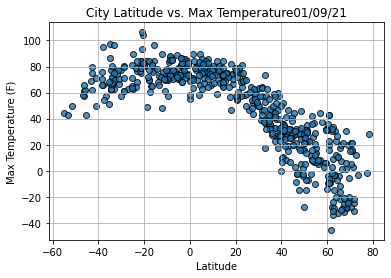

In [14]:
plt.scatter(lats,
            max_temps,
           edgecolor="black",linewidths=1,marker="o",
           alpha=0.8,label="Cities")
plt.title(f"City Latitude vs. Max Temperature" +time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("weather_data/Fig1.png")
plt.show()

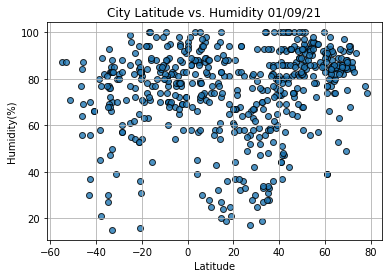

In [15]:
plt.scatter(lats,humidity,edgecolor="black",linewidths=1,marker="o",
           alpha=0.8,label="Cities")

plt.title(f"City Latitude vs. Humidity "+time.strftime("%x"))
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("weather_data/Fig2.png")
plt.show()

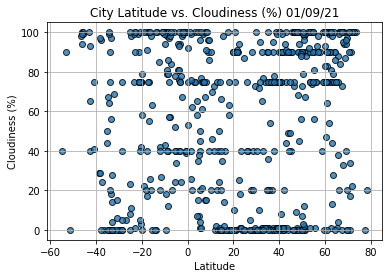

In [16]:
plt.scatter(lats,cloudiness,edgecolor="black",linewidths=1,marker="o",
           alpha=0.8, label = "Cities")

plt.title(f"City Latitude vs. Cloudiness (%) "+time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("weather_data/Fig3.png")
plt.show()

In [ ]:
plt.scatter(lats,wind_speed,edgecolor="black",linewidths=1,marker="o",
           alpha=0.8, label="Cities")

plt.title(f"City Latitude vs. Wind Speed" + time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("weather_data/Fig4.png")
plt.show()